In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


a_predicted = 2.1123848510703556 
a = 2 
b_predicted = 7.455368132377047 
b = 7


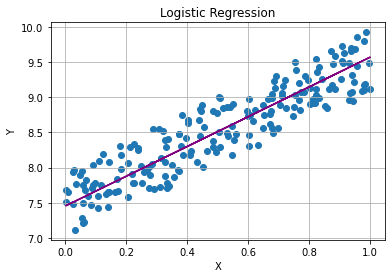

In [4]:
#Linear regression

size = 200

A = 2
B = 7
x = np.random.random(size=size)
noise = np.random.random(size=size)

y = A*x+B+noise

data = {'X': x, 'Y': y}
df = pd.DataFrame(data, columns = ['X','Y'])
X = df['X'].values
Y = df['Y'].values

D_a = 0
D_b = 0

L = 0.01

n = float(len(X))
a = 2
b = 7

for i in range(2*len(X)):
    Y_pred = a*X + b
    D_a = (-2/n) * sum(X * (Y - Y_pred))
    D_b = (-2/n) * sum(Y - Y_pred)
    a = a - L * D_a
    b = b - L * D_b

Y_pred = a*X + b
print (f'a_predicted = {a} \na = {A} \nb_predicted = {b} \nb = {B}')

plt.show()

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='purple')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression')
plt.grid()
plt.show()

Accuracy:  0.825


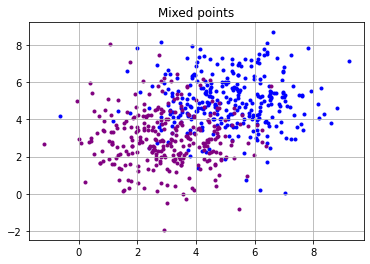

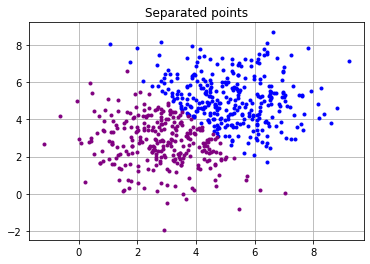

In [8]:
# Logistic regression


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

num_points = 300
a0=np.array([0,0])
b0=0
learning_rate_a=0.1
learning_rate_b=0.1
mean_1 = [5, 5]
cov_1 = [[2, 0], [0, 2]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
mean_2 = [3, 3]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

plt.title('Mixed points')
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '.', color='blue')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = '.', color='purple')
plt.grid()


def sigmoid(value):
    return 1 / (1 + np.exp(-value))

def gradient_descent(x, y, iterations, learning_rate_a, learning_rate_b):
    a = a0
    b = b0
    for i in range(iterations):
        f = sigmoid(x.dot(a) + b)
        da = np.dot(x.T, (f - y))/x.shape[0]
        db = (f - y).mean()
        a = a - learning_rate_a * da
        b = b - learning_rate_b * db
    return a, b

def predict(x, a, b):
    predict = np.zeros(x.shape[0])
    f = sigmoid(x.dot(a) + b)
    for i in range(x.shape[0]):
        if(f[i] >= 0.5):
            predict[i] = 1
    return predict


iterations = 2000

x = np.concatenate([x_1,x_2])
y = np.hstack((np.array([0] * num_points), np.array([1]*num_points)))

a, b = gradient_descent(x, y, iterations,  learning_rate_a, learning_rate_b)
result = predict(x,a,b)
print("Accuracy: ", 1 - abs(y-result).mean())

plt.figure(figsize=(6,4))
plt.plot(x[:,0][result==0], x[:,1][result==0], 'r.', color='blue')
plt.title('Separated points')
plt.plot(x[:,0][result==1], x[:,1][result==1], 'b.', color='purple')
plt.grid()
plt.show()